In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [58]:
# Load dataset
df = pd.read_excel("CleanData/Merged.xlsx")  # Replace with actual file path

df['CO2_diff'] = - df['testo 160 IAQ_51616135_outdoor [ppm]'] + df['testo 160 IAQ_51616142 [ppm]']

In [3]:
df.columns

Index(['testo 160 IAQ_51616135_outdoor [ppm]',
       'testo 160 IAQ_51616135_outdoor [°C]',
       'testo 160 IAQ_51616135_outdoor [mbar]',
       'testo 160 IAQ_51616135_outdoor [%RH]',
       'testo 160 IAQ_51616135_outdoor [°C td]',
       'testo 160 IAQ_51616135_outdoor [g/m³]', 'DateTime',
       'testo 160 IAQ_51616142 [ppm]', 'testo 160 IAQ_51616142 [°C]',
       'testo 160 IAQ_51616142 [mbar]', 'testo 160 IAQ_51616142 [%RH]',
       'testo 160 IAQ_51616142 [°C td]', 'testo 160 IAQ_51616142 [g/m³]',
       'Computer - kWatts', 'Plug Load (kWatts)', 'Air Conditioner-kWatts',
       'light + fan - kWatts '],
      dtype='object')

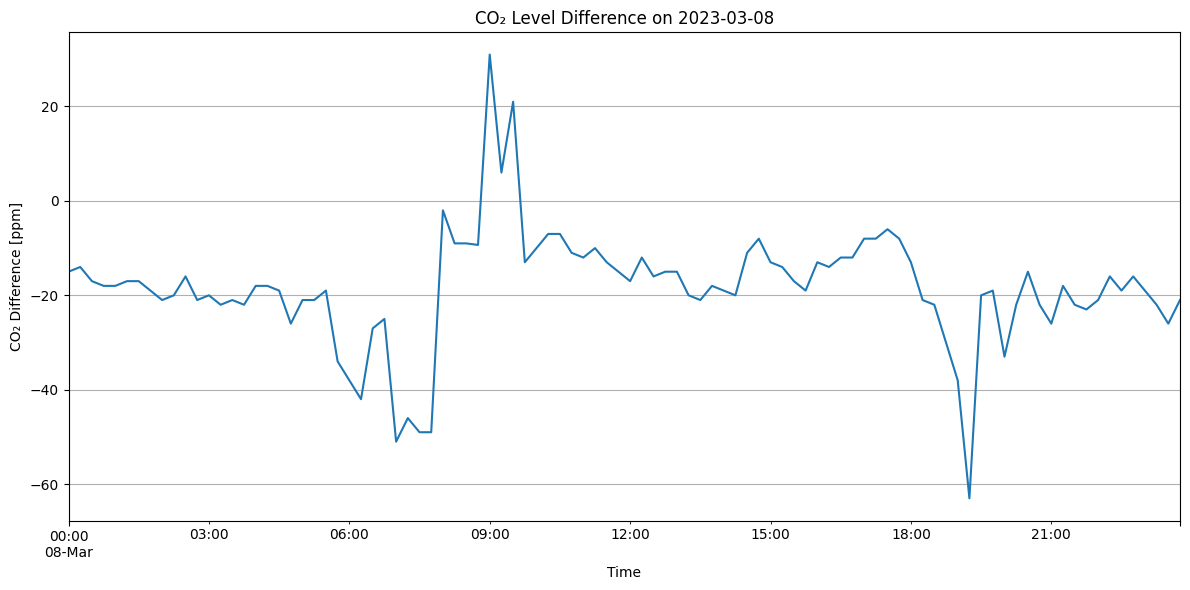

In [45]:
import matplotlib.pyplot as plt

day = '2023-03-08'  # Change to your desired date
mask = df['DateTime'].dt.date == pd.to_datetime(day).date()
df_day = df[mask]

# Set DateTime as index
df_day.set_index('DateTime', inplace=True)

# Plot
df_day['CO2_diff'].plot(figsize=(12, 6), title=f'CO₂ Level Difference on {day}')
plt.xlabel('Time')
plt.ylabel('CO₂ Difference [ppm]')
plt.grid(True)
plt.tight_layout()
plt.show()

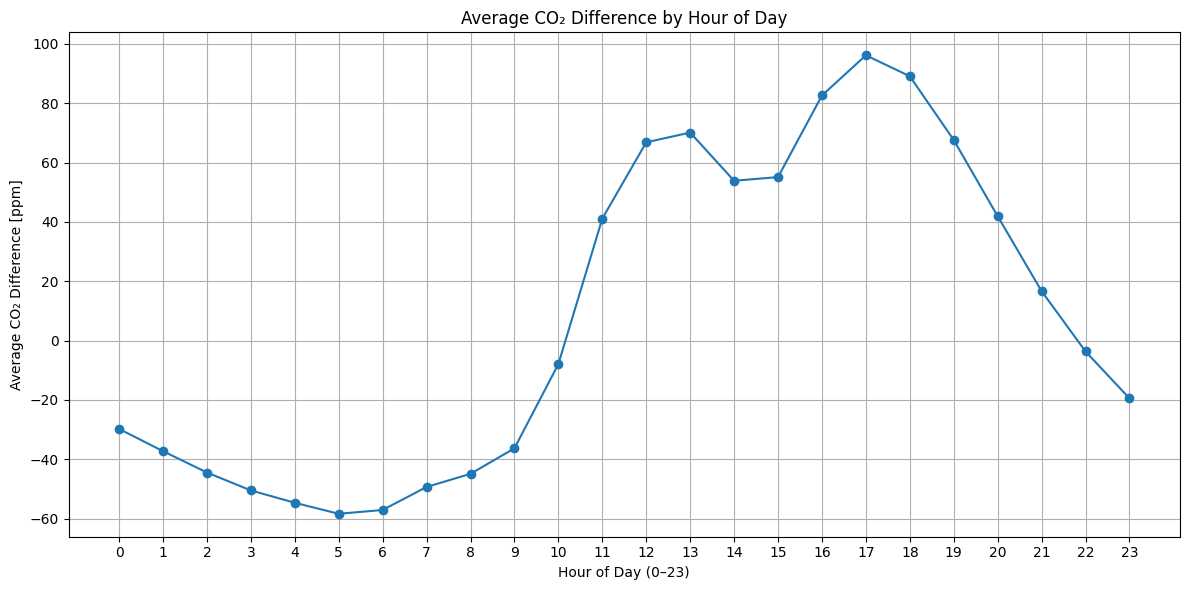

In [46]:
import matplotlib.pyplot as plt
import pandas as pd



# Extract hour from DateTime
df['Hour'] = df['DateTime'].dt.hour

# Group by hour and calculate mean CO₂ difference
hourly_avg = df.groupby('Hour')['CO2_diff'].mean()

# Plot
hourly_avg.plot(kind='line', figsize=(12, 6), marker='o', title='Average CO₂ Difference by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Average CO₂ Difference [ppm]')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


d:\Program Files\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


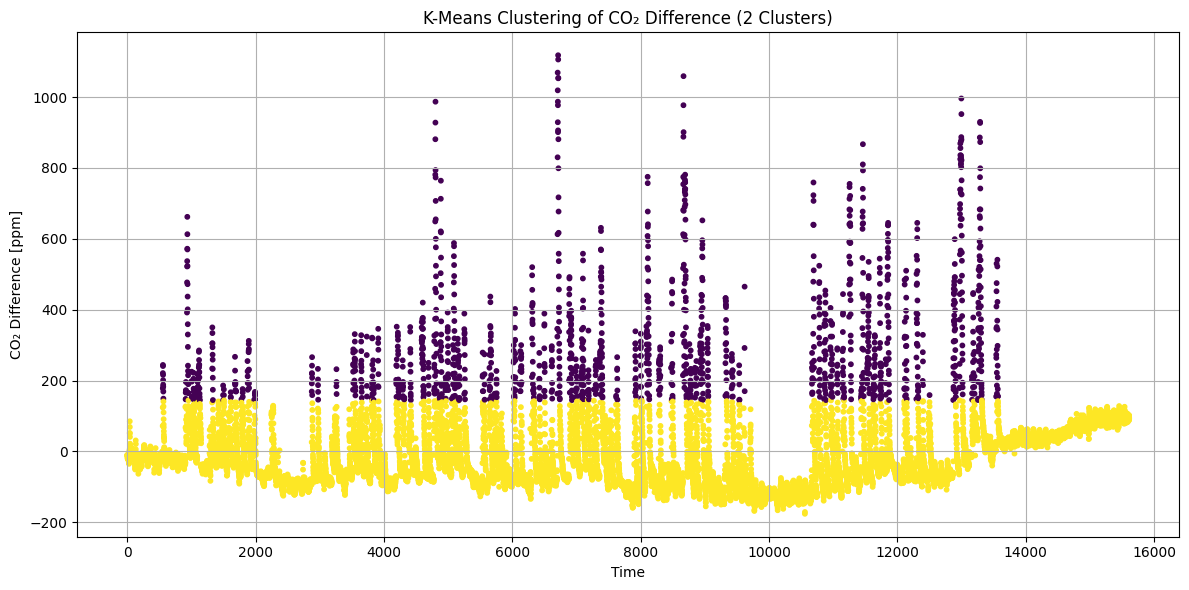

In [47]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data (drop NaNs and reshape for KMeans)
co2_data = df[['CO2_diff']].dropna()

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
co2_data['Cluster'] = kmeans.fit_predict(co2_data)

# Optional: plot with color-coded clusters
plt.figure(figsize=(12, 6))
plt.scatter(co2_data.index, co2_data['CO2_diff'], c=co2_data['Cluster'], cmap='viridis', s=10)
plt.title('K-Means Clustering of CO₂ Difference (2 Clusters)')
plt.xlabel('Time')
plt.ylabel('CO₂ Difference [ppm]')
plt.grid(True)
plt.tight_layout()
plt.show()


d:\Program Files\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


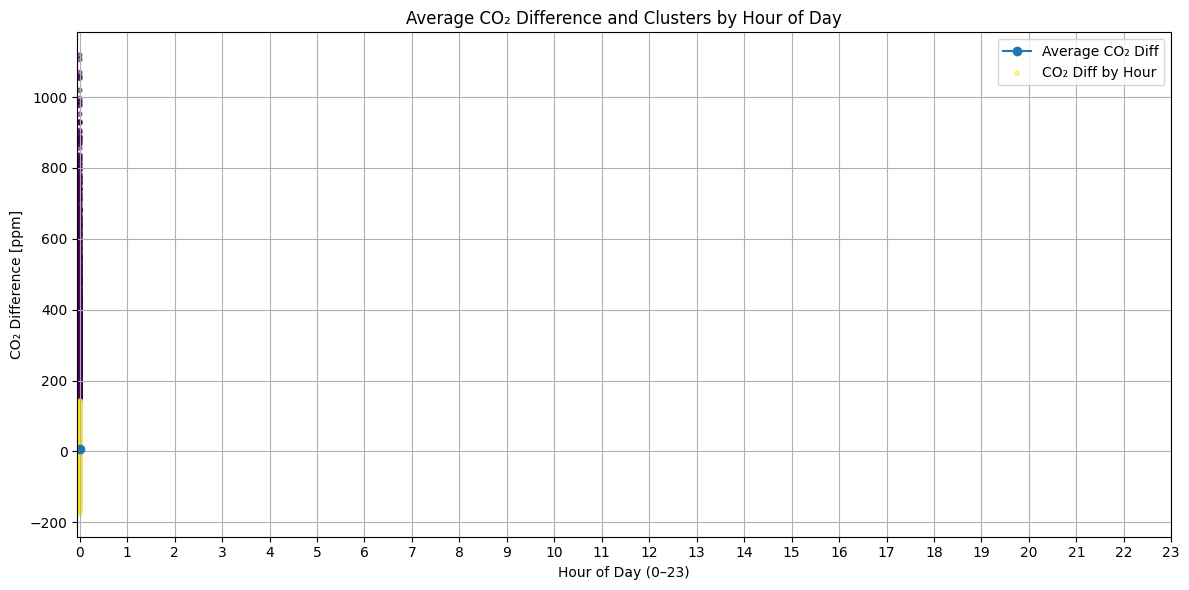

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# 1. Prepare the data (drop NaNs and reshape for KMeans)
co2_data = df[['CO2_diff']].dropna()

# 2. Fit KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
co2_data['Cluster'] = kmeans.fit_predict(co2_data)

# 3. Ensure index is datetime
co2_data.index = pd.to_datetime(co2_data.index)

# 4. Extract the hour of day
co2_data['Hour'] = co2_data.index.hour

# 5. Group by hour and compute mean CO2_diff, while considering clusters
hourly_avg = co2_data.groupby('Hour')['CO2_diff'].mean()

# 6. Plot the hourly average CO2_diff
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', color='tab:blue', label='Average CO₂ Diff')

# 7. Optionally, scatter plot CO2_diff for the entire dataset, color-coded by cluster
plt.scatter(co2_data.index.hour + co2_data.index.minute / 60, co2_data['CO2_diff'],
            c=co2_data['Cluster'], cmap='viridis', s=10, alpha=0.5, label='CO₂ Diff by Hour')

# 8. Adding labels and title
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('CO₂ Difference [ppm]')
plt.title('Average CO₂ Difference and Clusters by Hour of Day')
plt.xticks(range(0, 24))
plt.grid(True)

# 9. Show the plot with legend
plt.legend()
plt.tight_layout()
plt.show()


d:\Program Files\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


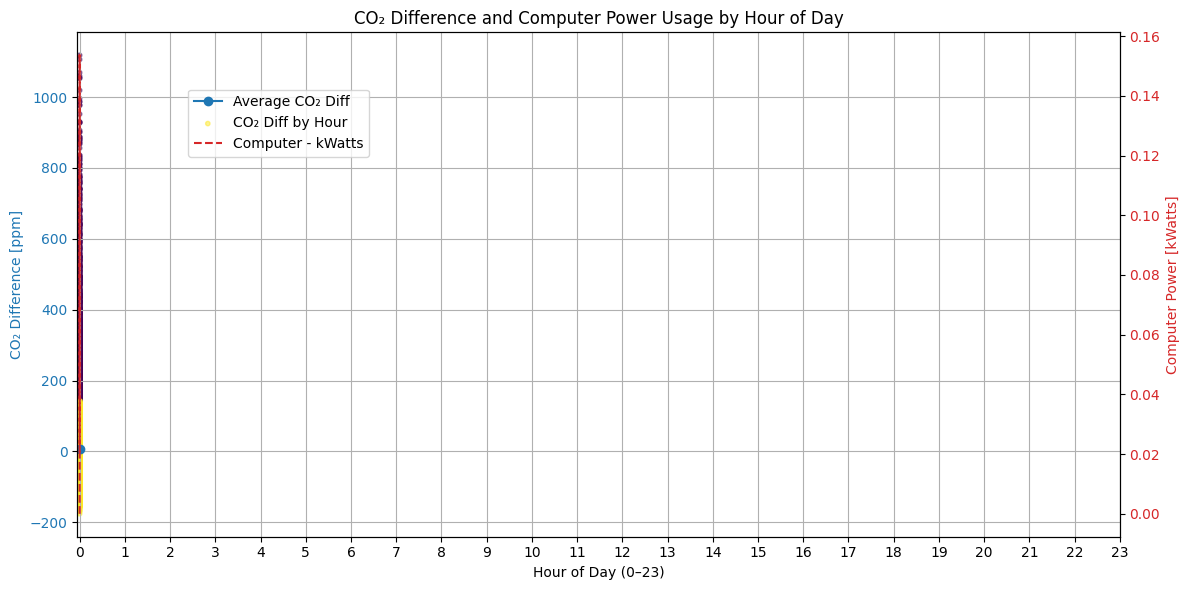

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# 1. Prepare the data (drop NaNs and reshape for KMeans)
co2_data = df[['CO2_diff', 'Computer - kWatts']].dropna()  # include Computer_kWatts here

# 2. Fit KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
co2_data['Cluster'] = kmeans.fit_predict(co2_data)

# 3. Ensure index is datetime
co2_data.index = pd.to_datetime(co2_data.index)

# 4. Extract the hour of day
co2_data['Hour'] = co2_data.index.hour

# 5. Group by hour and compute mean CO2_diff, while considering clusters
hourly_avg = co2_data.groupby('Hour')['CO2_diff'].mean()

# 6. Plot the hourly average CO2_diff
fig, ax1 = plt.subplots(figsize=(12, 6))

# 7. Plot CO₂ Difference (left y-axis)
ax1.plot(hourly_avg.index, hourly_avg.values, marker='o', color='tab:blue', label='Average CO₂ Diff')
ax1.set_xlabel('Hour of Day (0–23)')
ax1.set_ylabel('CO₂ Difference [ppm]', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 8. Scatter plot CO2_diff for the entire dataset, color-coded by cluster
ax1.scatter(co2_data.index.hour + co2_data.index.minute / 60, co2_data['CO2_diff'],
            c=co2_data['Cluster'], cmap='viridis', s=10, alpha=0.5, label='CO₂ Diff by Hour')

# 9. Create second y-axis for Computer kWatts
ax2 = ax1.twinx()
ax2.plot(co2_data.index.hour + co2_data.index.minute / 60, co2_data['Computer - kWatts'],
         color='tab:red', label='Computer - kWatts', linestyle='--')
ax2.set_ylabel('Computer Power [kWatts]', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 10. Adding title and grid
plt.title('CO₂ Difference and Computer Power Usage by Hour of Day')
plt.xticks(range(0, 24))
ax1.grid(True)

# 11. Show the plot with legend
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9), bbox_transform=ax1.transAxes)
plt.show()
